# Project 7

You are a data scientist working for a Consulting Firm. You are given a dataset containing in **sentiment140.csv** Download **sentiment140.csv.** 

The data set has six columns without header:

1. the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
2. the id of the tweet (2087)
3. the date of the tweet (Sat May 16 23:58:44 UTC 2009)
4. the query (lyx). If there is no query, then this value is NO_QUERY.
5. the user that tweeted (robotickilldozr)
6. the text of the tweet ("Lyx is cool")

Data source: Sentiment140Links to an external site. (Go, A. et. al., Stanford University)

 

### Steps and Questions:

Our goal is to visualize the text of the tweet.

1. Load the dataset of sentiment140.csv into memory.
2. Clean and preprocess the texts.
3. Graphically summarize the polarity of the tweet.
4. Graphically summarize the length of the text of the tweet using.
    - histogram
    - boxplot
    - density plot
5. Graphically summarize the word count of the text of the tweet using
    - histogram
    - boxplot
    - density plot
6. Graphically summarize the top 5 bigrams (2-gram) of the tf-idf of the text of the tweet.
7. Visualize the top 5 term frequency of the tokens associated with negative tweets using scattertext.
8. Visualize the top 5 negative scores of the tokens associated with negative tweets using scattertext.
9. Visualize the first five sentences embedding for each tweet using PCA.
10. Visualize the first five sentences embedding for each tweet using t-SNE.

## Load Necessary Libraries

In [1]:
#!pip install scattertext

#!pip install statsmodels


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import spacy
from collections import Counter


nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/thinc/compat.py:36: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  hasattr(torch, "has_mps")
/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/thinc/compat.py:37: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  and torch.has_mps  # type: ignore[attr-defined]
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthewmoore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Load the dataset of sentiment140.csv into memory.

In [3]:
# Load dataset
df = pd.read_csv("/Users/matthewmoore/Downloads/sentiment140.csv", encoding = 'ISO-8859-1')

# Display dataset
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
df.columns = [
    "polarity",
    "tweet_id",
    "date",
    "query",
    "user",
    "text" 
]

In [5]:
df

,polarity,tweet_id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## 2. Clean and preprocess the texts.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1599999 non-null  int64 
 1   tweet_id  1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   user      1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

polarity    0.0
tweet_id    0.0
date        0.0
query       0.0
user        0.0
text        0.0
dtype: float64

In [8]:
# This shows how many rows have polarity == 0, 2, or 4
df["polarity"].value_counts()

4    800000
0    799999
Name: polarity, dtype: int64

In [9]:
df = df.drop(columns=['date', 'query', 'user'])

In [10]:
nlp = spacy.load("en_core_web_sm")

stop_words = spacy.lang.en.stop_words.STOP_WORDS

df['clean_text'] = df['text'].apply(
    lambda x: ' '.join(
        token.lemma_
        for token in nlp(
            re.sub(r"(nan)|(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", 
                   " ", 
                   str(x))
        )
        if token.text.lower() not in stop_words
    ).lower().strip()
)

In [11]:
"""df = df.drop(columns=['date', 'query', 'user'])

df['clean_text'] = df['text'].apply(
    lambda x: ' '.join(
        re.sub(r"(nan)|(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", 
               " ", 
               str(x)).split()
    ).lower()
)

df.head(10)
"""

'df = df.drop(columns=[\'date\', \'query\', \'user\'])\n\ndf[\'clean_text\'] = df[\'text\'].apply(\n    lambda x: \' \'.join(\n        re.sub(r"(nan)|(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\\w+:\\/\\/\\S+)", \n               " ", \n               str(x)).split()\n    ).lower()\n)\n\ndf.head(10)\n'

## 3. Graphically summarize the polarity of the tweet.

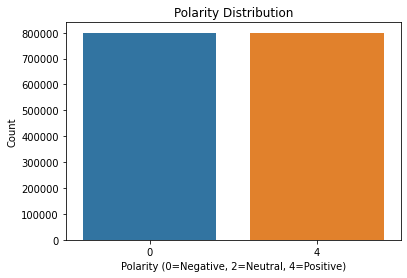

In [12]:
sns.countplot(data=df, x="polarity")
plt.title("Polarity Distribution")
plt.xlabel("Polarity (0=Negative, 2=Neutral, 4=Positive)")
plt.ylabel("Count")
plt.show()

## 4. Graphically summarize the length of the text of the tweet using: histogram, boxplot, density plot

<ipython-input-13-124c3d102c72>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["text_length"], shade=True, color='red')


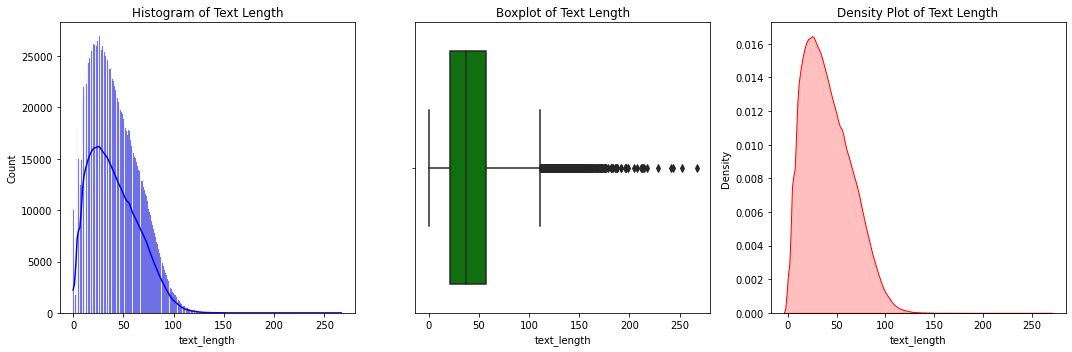

In [13]:
# Length of text
df["text_length"] = df["clean_text"].apply(len)

plt.figure(figsize=(15,5))

# Histogram
plt.subplot(1,3,1)
sns.histplot(df["text_length"], kde=True, color='blue')
plt.title("Histogram of Text Length")

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=df["text_length"], color='green')
plt.title("Boxplot of Text Length")

# Density Plot
plt.subplot(1,3,3)
sns.kdeplot(df["text_length"], shade=True, color='red')
plt.title("Density Plot of Text Length")

plt.tight_layout()
plt.show()


## 5. Graphically summarize the word count of the text of the tweet using: histogram, boxplot, density plot


<ipython-input-14-a1eb9ed2936e>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["word_count"], shade=True, color='red')


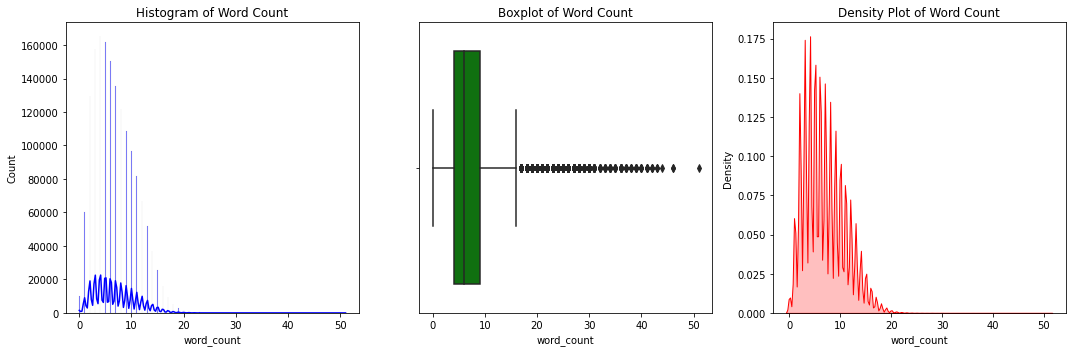

In [14]:
# Calculate the word count
df["word_count"] = df["clean_text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(15,5))

# Histogram
plt.subplot(1,3,1)
sns.histplot(df["word_count"], kde=True, color='blue')
plt.title("Histogram of Word Count")

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=df["word_count"], color='green')
plt.title("Boxplot of Word Count")

# Density Plot
plt.subplot(1,3,3)
sns.kdeplot(df["word_count"], shade=True, color='red')
plt.title("Density Plot of Word Count")

plt.tight_layout()
plt.show()


## 6. Graphically summarize the top 5 bigrams (2-gram) of the tf-idf of the text of the tweet.

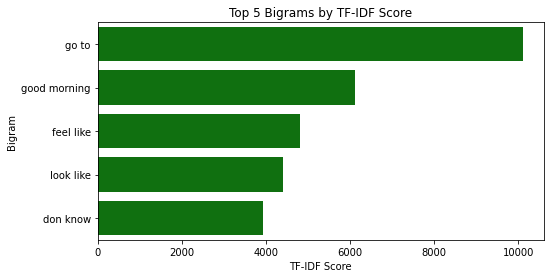

In [15]:
# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2), max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(df["clean_text"])

# Sum the TF-IDF scores for each bigram
sum_tfidf = X_tfidf.sum(axis=0).A1
vocab = tfidf_vectorizer.get_feature_names()
tfidf_scores = list(zip(vocab, sum_tfidf))

# Sort TF-IDF score
tfidf_scores_sorted = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# Top 5 bigrams
top5_bigrams = tfidf_scores_sorted[:5]

# Convert to DF
top5_bigrams_df = pd.DataFrame(top5_bigrams, columns=['bigram','tfidf_score'])

plt.figure(figsize=(8,4))
sns.barplot(data=top5_bigrams_df, x='tfidf_score', y='bigram', color='green')
plt.title("Top 5 Bigrams by TF-IDF Score")
plt.xlabel("TF-IDF Score")
plt.ylabel("Bigram")
plt.show()


## 7. Visualize the top 5 term frequency of the tokens associated with negative tweets using scattertext.

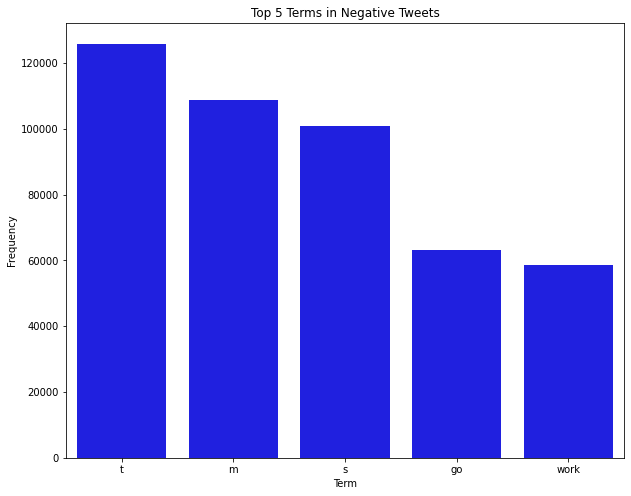

In [16]:
neg_df = df[df["polarity"] == 0].copy()

# Combine negative text into one string
all_neg_text = " ".join(neg_df["clean_text"].astype(str).tolist())

#  Tokenize text
neg_tokens = all_neg_text.split()

# 4) Top 5 by word count
top_5_neg = Counter(neg_tokens).most_common(5)

# Top 5 DF
words, counts = zip(*top_5_neg)
freq_df = pd.DataFrame({"word": words, "count": counts})

# Plot Results
plt.figure(figsize=(10,8))
sns.barplot(data=freq_df, x="word", y="count", color='blue')
plt.title("Top 5 Terms in Negative Tweets")
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.show()


## 8. Visualize the top 5 negative scores of the tokens associated with negative tweets using scattertext.

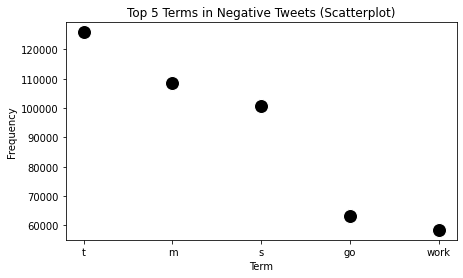

In [17]:
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=freq_df, 
    x="word",
    y="count",
    color='black',
    s=200
)

plt.title("Top 5 Terms in Negative Tweets (Scatterplot)")
plt.xlabel("Term")
plt.ylabel("Frequency")

plt.show()

In [18]:
neg_tokens = []
for tweet in neg_df['clean_text']:
    neg_tokens.extend(tweet.split())

neg_freq = Counter(neg_tokens).most_common(5)
neg_freq


[('t', 125841), ('m', 108565), ('s', 100830), ('go', 63230), ('work', 58454)]

## 9. Visualize the first five sentences embedding for each tweet using PCA.

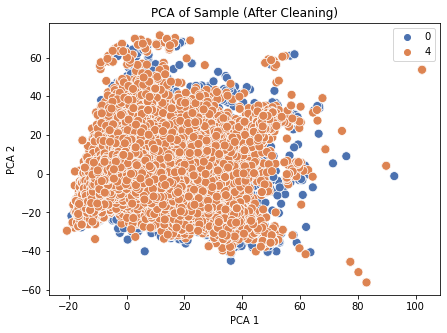

In [19]:
nlp = spacy.load("en_core_web_lg")

embeddings = []
for text in df["clean_text"]:
    doc = nlp(text)
    embeddings.append(doc.vector)

# Convert to a NumPy array
X = np.array(embeddings)

# PCA Components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

df["pca_x"] = pca_result[:, 0]
df["pca_y"] = pca_result[:, 1]

# Show Results
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="pca_x", y="pca_y", hue="polarity", palette="deep", s=80)
plt.title("PCA of Sample (After Cleaning)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

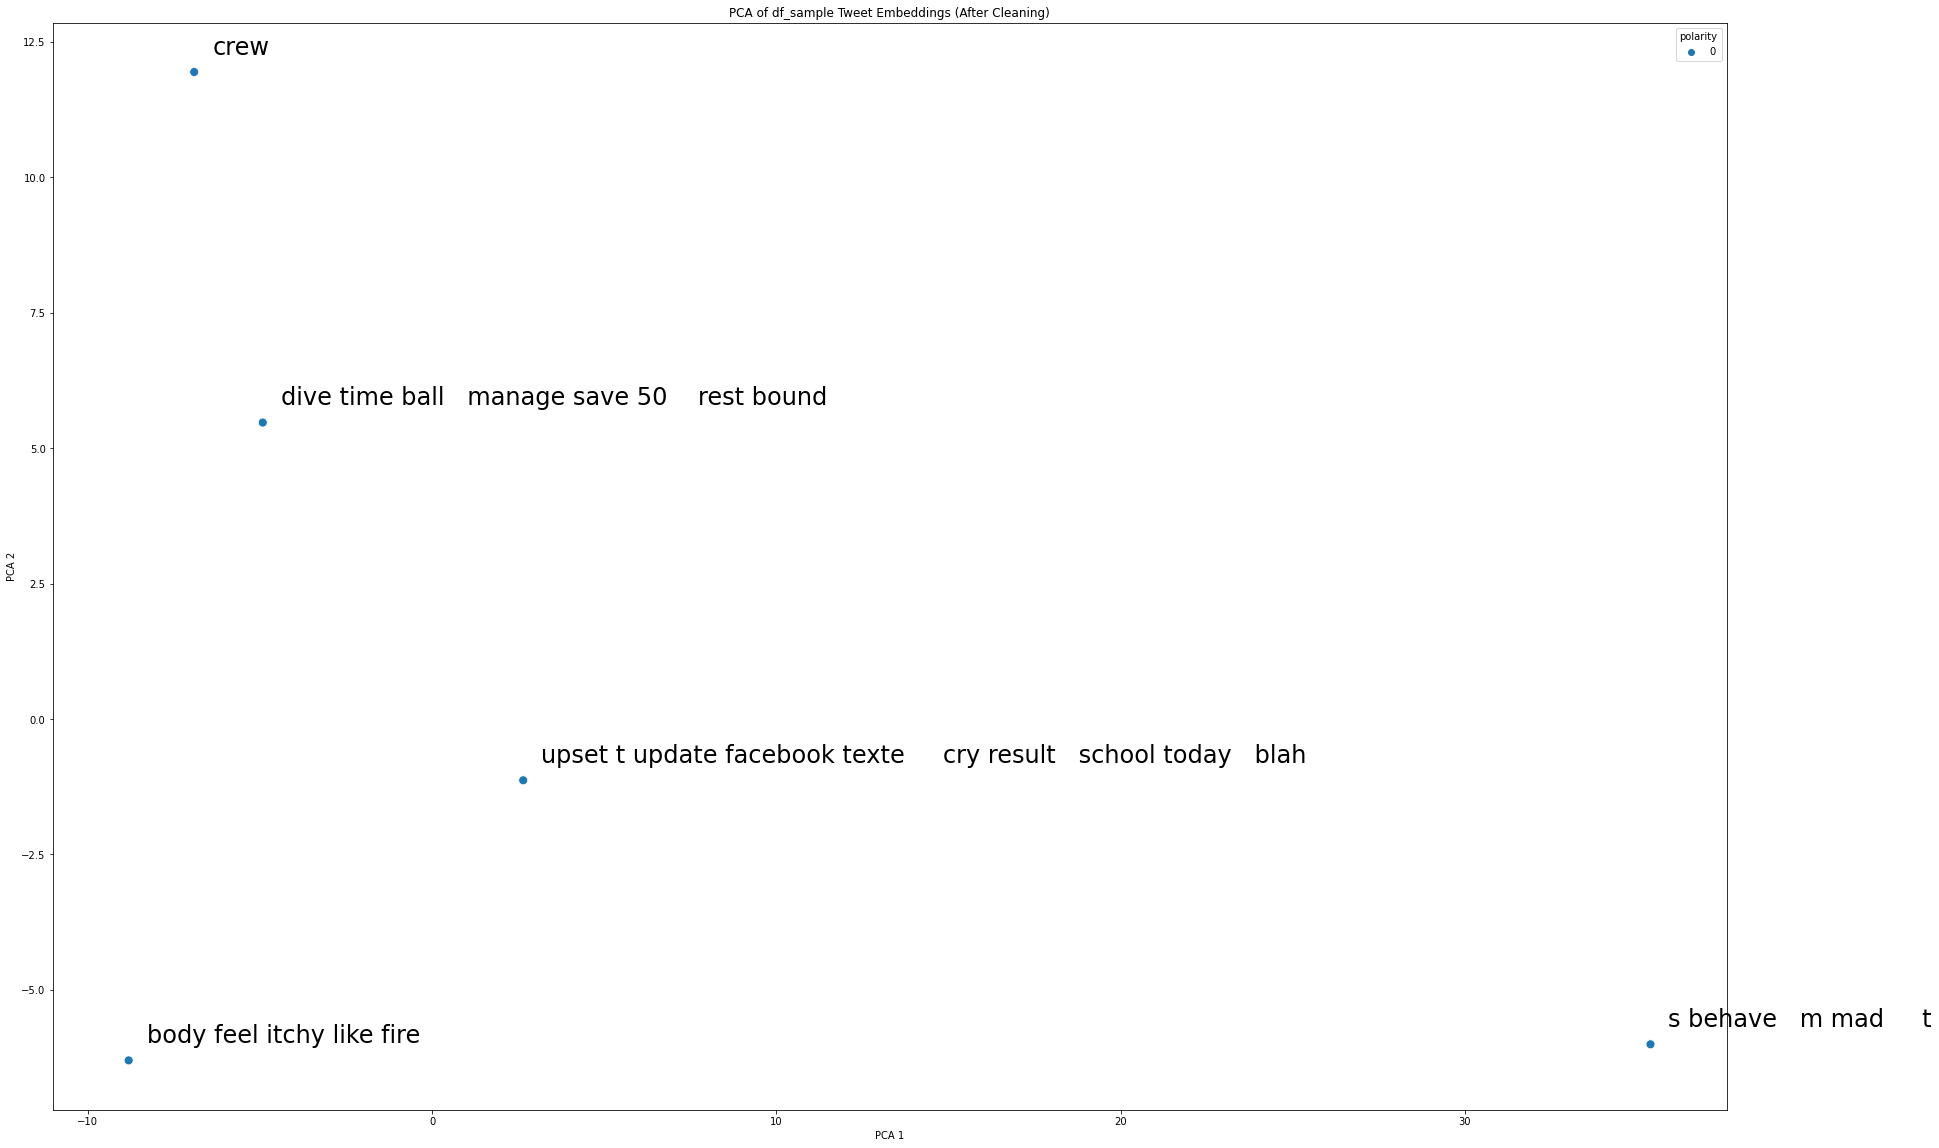

In [20]:
df_sub = df.head(5).copy()

plt.figure(figsize=(30, 20))

sns.scatterplot(data=df_sub, x="pca_x", y="pca_y", hue="polarity", s=80)
plt.title("PCA of df_sample Tweet Embeddings (After Cleaning)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")


for i, row in df_sub.iterrows():
    plt.annotate(
        row["clean_text"],
        (row["pca_x"], row["pca_y"]),
        xytext=(18, 18),
        textcoords="offset points",
        fontsize=24
    )

plt.show()

## 10. Visualize the first five sentences embedding for each tweet using t-SNE.

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(embeddings)

df['tsne_x'] = tsne_result[:, 0]
df['tsne_y'] = tsne_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='tsne_x', 
    y='tsne_y', 
    hue='polarity', 
    data=df,
    palette="deep"
)
plt.title("t-SNE of Tweet Embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()


In [ ]:
df_sub = df.head(5).copy()

plt.figure(figsize=(50, 50))  

sns.scatterplot(data=df_sub, x="tsne_x", y="tsne_y", hue="polarity", s=80)
plt.title("t-SNE of Tweet Embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t_SNE 2")

for i, row in df_sub.iterrows():
    plt.annotate(
        row["clean_text"],
        (row["tsne_x"], row["tsne_y"]),
        xytext=(60, 60),
        textcoords="offset points",
        fontsize=12
    )

plt.show()